In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage.filters import threshold_otsu
import phantom_generator as pg

In [2]:
import h5py

h5f = h5py.File('sample.h5','r')

img2d = h5f['layer1'][:]
h5f.close()

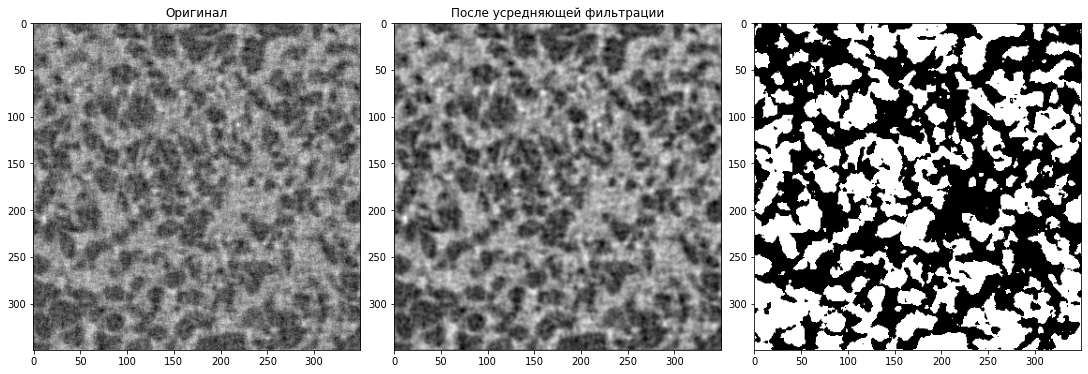

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5), constrained_layout=True)

axes[0].imshow(img2d, cmap='gray')
axes[0].set_title("Оригинал")

kernel = np.asarray([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]]) / 9
img2d_filt = signal.fftconvolve(img2d, kernel, mode='same')
axes[1].imshow(img2d_filt, cmap='gray')
axes[1].set_title("После усредняющей фильтрации")

img2d_bin = img2d_filt < threshold_otsu(img2d_filt)
axes[2].imshow(img2d_bin, cmap='gray')


In [13]:
img2d_bin.sum()/img2d_bin.size

0.4802530612244898

In [12]:
img2d_bin.flatten()

array([ True, False, False, ...,  True,  True,  True])

anvar 3.1172863520408165
grimax 0.0
grimax_gaus 0.0


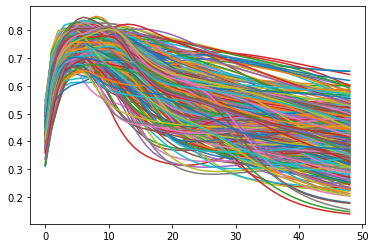

In [30]:
import wavelet_cpl_extractor as wce
import grimax_sigma_extractor as gse
import grimax_gaus_sigma_extractor as gse_gaus

for method_name in ["anvar", 
                    "grimax",
                    "grimax_gaus"]:

    if method_name == "anvar":
        extractor_func = wce.extract_cpl
        phantom = img2d_bin
    elif method_name == "grimax":
        phantom = img2d_bin.flatten() #.T
        extractor_func = gse.sigma_estimate_2
    elif method_name == "grimax_gaus":
        phantom = img2d_bin.flatten()
        extractor_func = gse_gaus.sigma_estimate_2

    #TODO: put magic_coef in other script
    magic_coef = 1.6 if method_name == "anvar" else 1
    calculated_sigma = extractor_func(phantom) / magic_coef
    print(method_name, calculated_sigma)

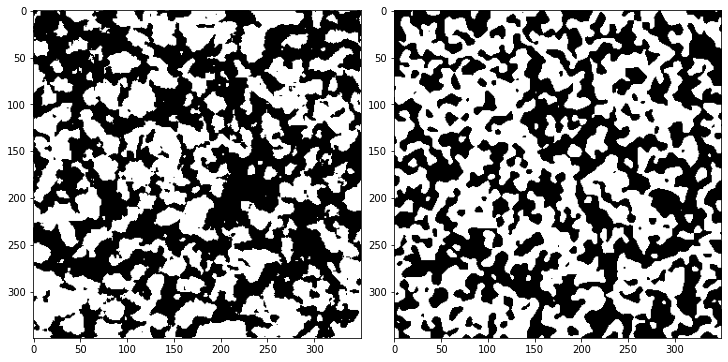

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5), constrained_layout=True)
axes[1].imshow(pg.gen_phantom(img2d_bin.shape, 0.48, 3.12), cmap="gray")
axes[0].imshow(img2d_bin, cmap="gray")